# Image Manipulation with skimage

This example builds a simple UI for performing basic image manipulation with [scikit-image](http://scikit-image.org/).

In [1]:
# Stdlib imports
from io import BytesIO

# Third-party libraries
from IPython.display import Image
from ipywidgets import interact, interactive, fixed
import matplotlib as mpl
from skimage import data, filters, io, img_as_float
import numpy as np

Let's load an image from scikit-image's collection, stored in the `data` module. These come back as regular numpy arrays:

In [2]:
i = img_as_float(data.coffee())
i.shape

(400, 600, 3)

Let's make a little utility function for displaying Numpy arrays with the IPython display protocol:

In [3]:
def arr2img(arr):
    """Display a 2- or 3-d numpy array as an image."""
    if arr.ndim == 2:
        format, cmap = 'png', mpl.cm.gray
    elif arr.ndim == 3:
        format, cmap = 'jpg', None
    else:
        raise ValueError("Only 2- or 3-d arrays can be displayed as images.")
    # Don't let matplotlib autoscale the color range so we can control overall luminosity
    vmax = 255 if arr.dtype == 'uint8' else 1.0
    with BytesIO() as buffer:
        mpl.image.imsave(buffer, arr, format=format, cmap=cmap, vmin=0, vmax=vmax)
        out = buffer.getvalue()
    return Image(out)

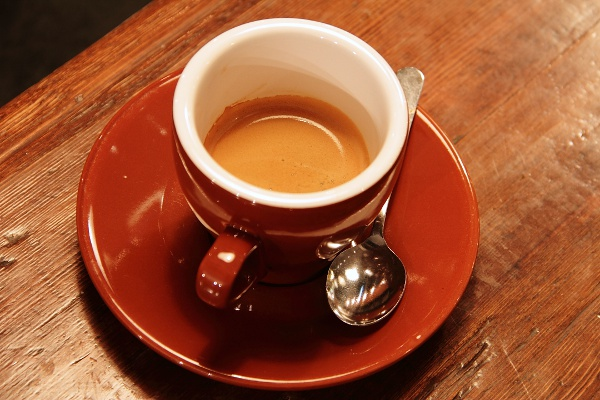

In [4]:
arr2img(i)

Now, let's create a simple "image editor" function, that allows us to blur the image or change its color balance:

In [5]:
def edit_image(image, sigma=0.1, R=1.0, G=1.0, B=1.0):
    new_image = filters.gaussian(image, sigma=sigma, multichannel=True)
    new_image[:,:,0] = R*new_image[:,:,0]
    new_image[:,:,1] = G*new_image[:,:,1]
    new_image[:,:,2] = B*new_image[:,:,2]
    return arr2img(new_image)

We can call this function manually and get a new image. For example, let's do a little blurring and remove all the red from the image:

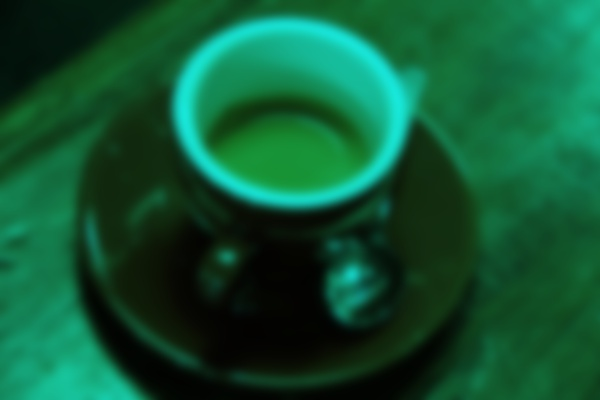

In [6]:
edit_image(i, sigma=5, R=0.1)

But it's a lot easier to explore what this function does by controlling each parameter interactively and getting immediate visual feedback. IPython's `ipywidgets` package lets us do that with a minimal amount of code:

In [7]:
lims = (0.0,1.0,0.01)
interact(edit_image, image=fixed(i), sigma=(0.0,10.0,0.1), R=lims, G=lims, B=lims);

A Jupyter Widget

# Browsing the scikit-image gallery, and editing grayscale and jpg images

The coffee cup isn't the only image that ships with scikit-image, the `data` module has others. Let's make a quick interactive explorer for this:

In [8]:
def choose_img(name):
    # Let's store the result in the global `img` that we can then use in our image editor below
    global img
    img = getattr(data, name)()
    return arr2img(img)

# Skip 'load' and 'lena', two functions that don't actually return images
interact(choose_img, name=sorted(set(data.__all__)-{'lena', 'load'}));

A Jupyter Widget

And now, let's update our editor to cope correctly with grayscale and color images, since some images in the scikit-image collection are grayscale.  For these, we ignore the red (R) and blue (B) channels, and treat 'G' as 'Grayscale':

In [9]:
lims = (0.0, 1.0, 0.01)

def edit_image(image, sigma, R, G, B):
    new_image = filters.gaussian(image, sigma=sigma, multichannel=True)
    if new_image.ndim == 3:
        new_image[:,:,0] = R*new_image[:,:,0]
        new_image[:,:,1] = G*new_image[:,:,1]
        new_image[:,:,2] = B*new_image[:,:,2]
    else:
        new_image = G*new_image
    return arr2img(new_image)

interact(edit_image, image=fixed(img), sigma=(0.0, 10.0, 0.1), 
               R=lims, G=lims, B=lims);

A Jupyter Widget